# AVA dataset explorer

This study aims to explore and select a chunk of the AVA dataset to be used in preliminary tests of a aesthetic classifier.

In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

First of all the dataset must be loaded. The headers of the dataset will also be loaded according to the definitions of thte AVA dataset.

In [3]:
ava_header = ["row_number",
                      "image_id",
                      "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
                      "Semantic Tag 1", "Semantic Tag 2",
                      "Challenge ID"]
ava_dataset = pd.read_table("AVA.txt", sep = " ", header=None, names = ava_header)
ava_dataset.head()

,row_number,image_id,1,2,3,4,5,6,7,8,9,10,Semantic Tag 1,Semantic Tag 2,Challenge ID
0,1,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396
1,2,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396
2,3,954184,0,0,4,8,41,56,10,3,4,0,0,0,1396
3,4,954113,0,1,4,6,48,37,23,5,2,2,15,21,1396
4,5,953980,0,3,6,15,57,39,6,1,1,1,22,38,1396


In [4]:
weights = [1,2,3,4,5,6,7,8,9,10]
ones = [1,1,1,1,1,1,1,1,1,1]

ava_dataset["mean"] = ava_dataset.loc[:, '1':'10'].dot(weights) / ava_dataset.loc[:, '1':'10'].dot(ones)

In [5]:
ava_dataset["mean > 5"] = ava_dataset["mean"] >= 5.0
ava_dataset["mean > 6"] = ava_dataset["mean"] >= 6.5
ava_dataset["mean < 4"] = ava_dataset["mean"] <= 4.5
ava_dataset["mean_2houses"] = ava_dataset["mean"].round(1)

In [6]:
ava_dataset.loc[:,'1':'10'].head()

,1,2,3,4,5,6,7,8,9,10
0,0,1,5,17,38,36,15,6,5,1
1,10,7,15,26,26,21,10,8,1,2
2,0,0,4,8,41,56,10,3,4,0
3,0,1,4,6,48,37,23,5,2,2
4,0,3,6,15,57,39,6,1,1,1


In [7]:
ava_dataset.head()

,row_number,image_id,1,2,3,4,5,6,7,8,9,10,Semantic Tag 1,Semantic Tag 2,Challenge ID,mean,mean > 5,mean > 6,mean < 4,mean_2houses
0,1,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396,5.637097,True,False,False,5.6
1,2,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396,4.698413,False,False,False,4.7
2,3,954184,0,0,4,8,41,56,10,3,4,0,0,0,1396,5.674603,True,False,False,5.7
3,4,954113,0,1,4,6,48,37,23,5,2,2,15,21,1396,5.773438,True,False,False,5.8
4,5,953980,0,3,6,15,57,39,6,1,1,1,22,38,1396,5.209302,True,False,False,5.2


In [8]:
ava_challenge_counts = ava_dataset.groupby(["Challenge ID"]).size()
ava_challenge_counts.sort_values(ascending=False).head().reset_index()

,Challenge ID,0
0,1005,1108
1,430,828
2,616,704
3,536,678
4,707,646


Note that the challenge with the most photos has only 1108 instances and it might be too small to be used in the preliminary tests. Let's group the challenges by semantic tags, which are a ggood way to grab pictures with the same category type.

In [9]:
ava_challenge_counts = ava_dataset.groupby(["Semantic Tag 1"]).size().rename('Count')
ava_challenge_counts.sort_values(ascending=False).head().reset_index()

,Semantic Tag 1,Count
0,0,58569
1,15,20827
2,14,18840
3,1,17851
4,18,13843


0 is the absense of a tag, but 15 stands for nature while 14 for landscapes and 1 for abstract. Let's focus on these 3 tags and ignore the rest of the instances. 

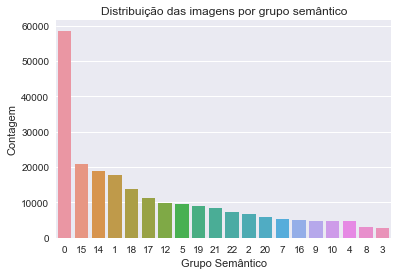

In [10]:
ava_nature = ava_dataset[ava_dataset["Semantic Tag 1"] == 15]
ava_landscapes = ava_dataset[ava_dataset["Semantic Tag 1"] == 14]
ava_abstract = ava_dataset[ava_dataset["Semantic Tag 1"] == 1]
pd.DataFrame(ava_challenge_counts.rename('Count').reset_index())

ordered_counts = ava_challenge_counts.rename('Count').reset_index().sort_values(by="Count", ascending=False).head(n=20)


ax = seaborn.barplot(ordered_counts["Semantic Tag 1"], ordered_counts["Count"], order=ordered_counts["Semantic Tag 1"])
ax.set(xlabel='Grupo Semântico', ylabel='Contagem')
ax.set_title("Distribuição das imagens por grupo semântico")

In [11]:
ordered_counts.head()

,Semantic Tag 1,Count
0,0,58569
15,15,20827
14,14,18840
1,1,17851
18,18,13843


In [12]:
ava_abstract.head()

,row_number,image_id,1,2,3,4,5,6,7,8,9,10,Semantic Tag 1,Semantic Tag 2,Challenge ID,mean,mean > 5,mean > 6,mean < 4,mean_2houses
0,1,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396,5.637097,True,False,False,5.6
1,2,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396,4.698413,False,False,False,4.7
44,45,954066,1,2,7,29,45,32,11,1,2,1,1,38,1396,5.129771,True,False,False,5.1
90,91,953715,3,4,10,37,46,25,5,2,1,0,1,51,1396,4.729323,False,False,False,4.7
98,99,953981,3,6,20,32,31,18,7,5,1,3,1,21,1396,4.714286,False,False,False,4.7


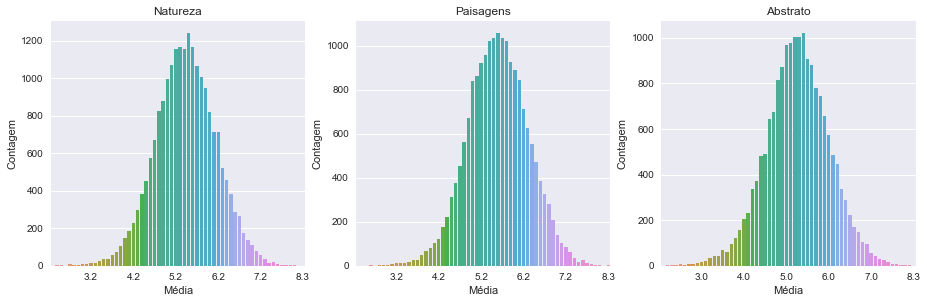

In [20]:
fig, axs = plt.subplots(ncols=3)
plot_nature = seaborn.countplot(x="mean_2houses", data=ava_nature, ax=axs[0])
plot_landscapes = seaborn.countplot(x="mean_2houses", data=ava_landscapes, ax=axs[1])
plot_abstract = seaborn.countplot(x="mean_2houses", data=ava_abstract, ax=axs[2])

fig.set_size_inches(15.5, 4.5)

def reduce_ticks(plot):
    for ind, label in enumerate(plot.get_xticklabels()):
        if ind % 10 == 9:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
            
reduce_ticks(plot_nature)
reduce_ticks(plot_landscapes)
reduce_ticks(plot_abstract)

plot_nature.set(xlabel = "Média", ylabel="Contagem")
plot_landscapes.set(xlabel = "Média", ylabel="Contagem")
plot_abstract.set(xlabel = "Média", ylabel="Contagem")

plot_nature.set_title("Natureza")
plot_landscapes.set_title("Paisagens")
plot_abstract.set_title("Abstrato")

fig.savefig(filename="Médias")

In [ ]:
plot_landscapes = seaborn.countplot(x="mean_2houses", data=ava_landscapes)

In [ ]:
plot_abstract = seaborn.countplot(x="mean_2houses", data=ava_abstract)

In [ ]:
ava_nature["mean_2houses"].mean()
ava_nature["mean_2houses"].std()